In [154]:
import librosa
import numpy as np
import math
from baseline.cnn.data_processing.feature_extractor import FeatureExtractor
from baseline.cnn.utils import prepare_input_features, get_tf_feature, read_audio
import multiprocessing
import os
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from scipy.io import wavfile

In [155]:
 path_to_scene_files = "../../clarity_CEC2_data_train/clarity_data/train/scenes/"

In [323]:
import warnings
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy.fft import rfft, rfftfreq

In [343]:
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa.display
import noisereduce as nr

In [158]:
# get training and validation file names
scene_filenames = glob.glob(os.path.join(path_to_scene_files, '*_hr.wav'))

In [159]:
file = scene_filenames[0]
clean_filename = file.replace("_hr", "_target_anechoic_CH1")
interferer_filename = file.replace("_hr", "_interferer_CH1")
mix_filename = file.replace("_hr", "_mix_CH1")
print(clean_filename)
print(mix_filename)
print(interferer_filename)

../../clarity_CEC2_data_train/clarity_data/train/scenes\S00001_target_anechoic_CH1.wav
../../clarity_CEC2_data_train/clarity_data/train/scenes\S00001_mix_CH1.wav
../../clarity_CEC2_data_train/clarity_data/train/scenes\S00001_interferer_CH1.wav


In [328]:
sr = 8000
windowLength = 256
overlap = round(0.25 * windowLength)

In [340]:
clean, sr = read_audio(clean_filename, sr)
noise, sr = read_audio(interferer_filename, sr)
mix, sr = read_audio(mix_filename, sr)

43691


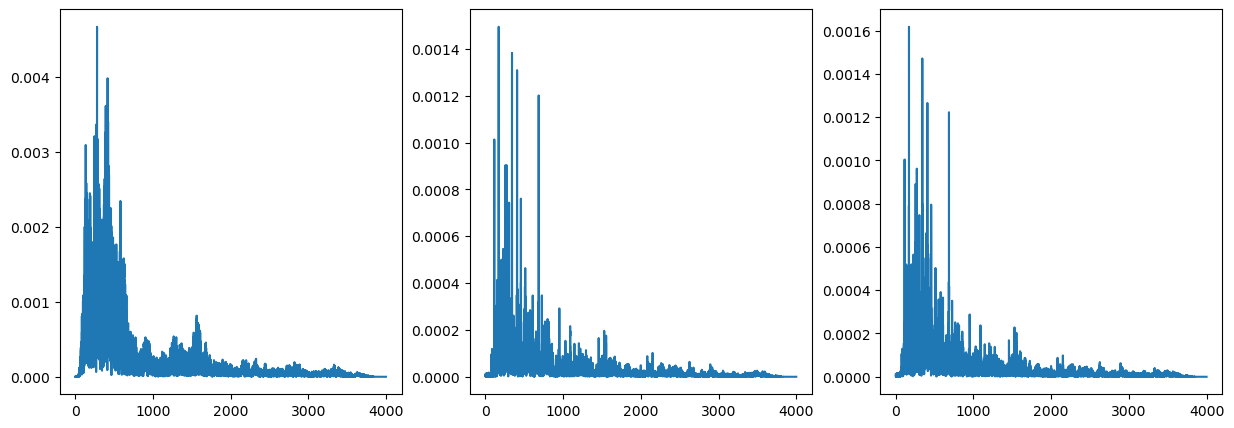

In [335]:
## PLOT SFFT
fig = plt.figure(figsize=(15, 5))
rows = 1
col = 3

fig.add_subplot(rows, col, 1)
N = len(clean)
print(N)
yf = rfft(clean)
xf = rfftfreq(N, 1 / sr)
plt.plot(np.abs(xf), np.abs(yf))

fig.add_subplot(rows, col, 2)
N = len(noise)
yf = rfft(noise)
xf = rfftfreq(N, 1 / sr)
plt.plot(np.abs(xf), np.abs(yf))

fig.add_subplot(rows, col, 3)
N = len(mix)
yf = rfft(mix)
xf = rfftfreq(N, 1 / sr)

plt.plot(np.abs(xf), np.abs(yf))
plt.show()

In [337]:
def get_features(audio, fs):
    input_fe = FeatureExtractor(audio, 
                                  windowLength=windowLength, 
                                  overlap=overlap,
                                  sample_rate=fs)
    aud_spec = input_fe.get_stft_spectrogram()
    aud_mel = input_fe.get_mel_spectrogram()
    return audio, aud_spec, aud_mel

In [338]:
def plot_wavespecmel(audio_list, spec_list, mel_list, figsize=(15,10)):
    nrows = 3
    ncols = len(audio_list)
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
    for i in range(0, ncols):
        librosa.display.waveshow(audio_files[i], sr=sr, ax=ax[0, i]) 
        librosa.display.specshow(specs[i], x_axis='time', ax=ax[1, i])
        librosa.display.specshow(librosa.power_to_db(specs[i]), x_axis='time', y_axis='log', ax=ax[2, i])

In [341]:
clean, clean_spec, clean_mel = get_features(clean, sr)
noise, noise_spec, noise_mel = get_features(noise, sr)
mix, mix_spec, mis_mel = get_features(mix, sr)

audio_files = [clean, noise, mix]
specs = [clean_spec, noise_spec, mix_spec]
mels = [clean_mel, noise_mel, mix_mel]

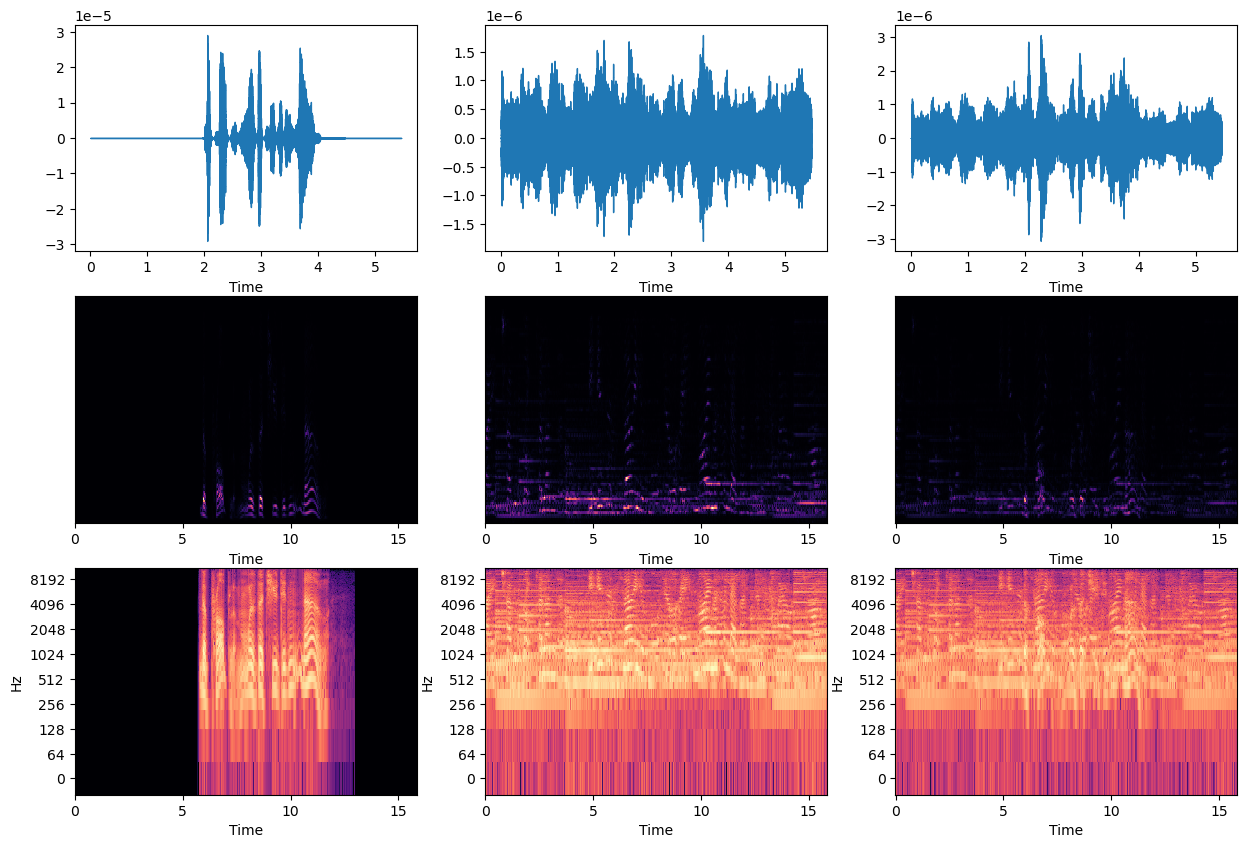

In [342]:
plot_wavespecmel(audio_files, specs, mels)

In [344]:
reduced_mix = nr.reduce_noise(y=mix, sr=sr)
reduced_mix, reduced_spec, reduced_mal = get_features(reduced_mix, sr)

audio_files.append(reduced_mix)
specs.append(reduced_spec)
mels.append(reduced_mel)


C:\Users\arrow\Desktop\venv\icassp\baseline\cnn\data_processing\feature_extractor.py:23: FutureWarning: Pass y=[-1.1586815e-09  1.1847524e-09  2.0451147e-09 ... -9.8076747e-10
 -7.1177586e-10 -1.3542663e-10] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',


In [348]:
aud = reduced_input_fe.get_audio_from_mel_spectrogram(reduced_mel)
aud, aud_spec, aud_mal = get_features(aud, sr)

audio_files.append(aud)
specs.append(aud_spec)
mels.append(aud_mel)

C:\Users\arrow\Desktop\venv\icassp\baseline\cnn\data_processing\feature_extractor.py:23: FutureWarning: Pass y=[-2.71221950e-07  3.64861918e-08  2.91119221e-07 ... -1.35388865e-08
 -1.94600176e-08 -1.91377634e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.feature.melspectrogram(self.audio, sr=self.sample_rate, power=2.0, pad_mode='reflect',


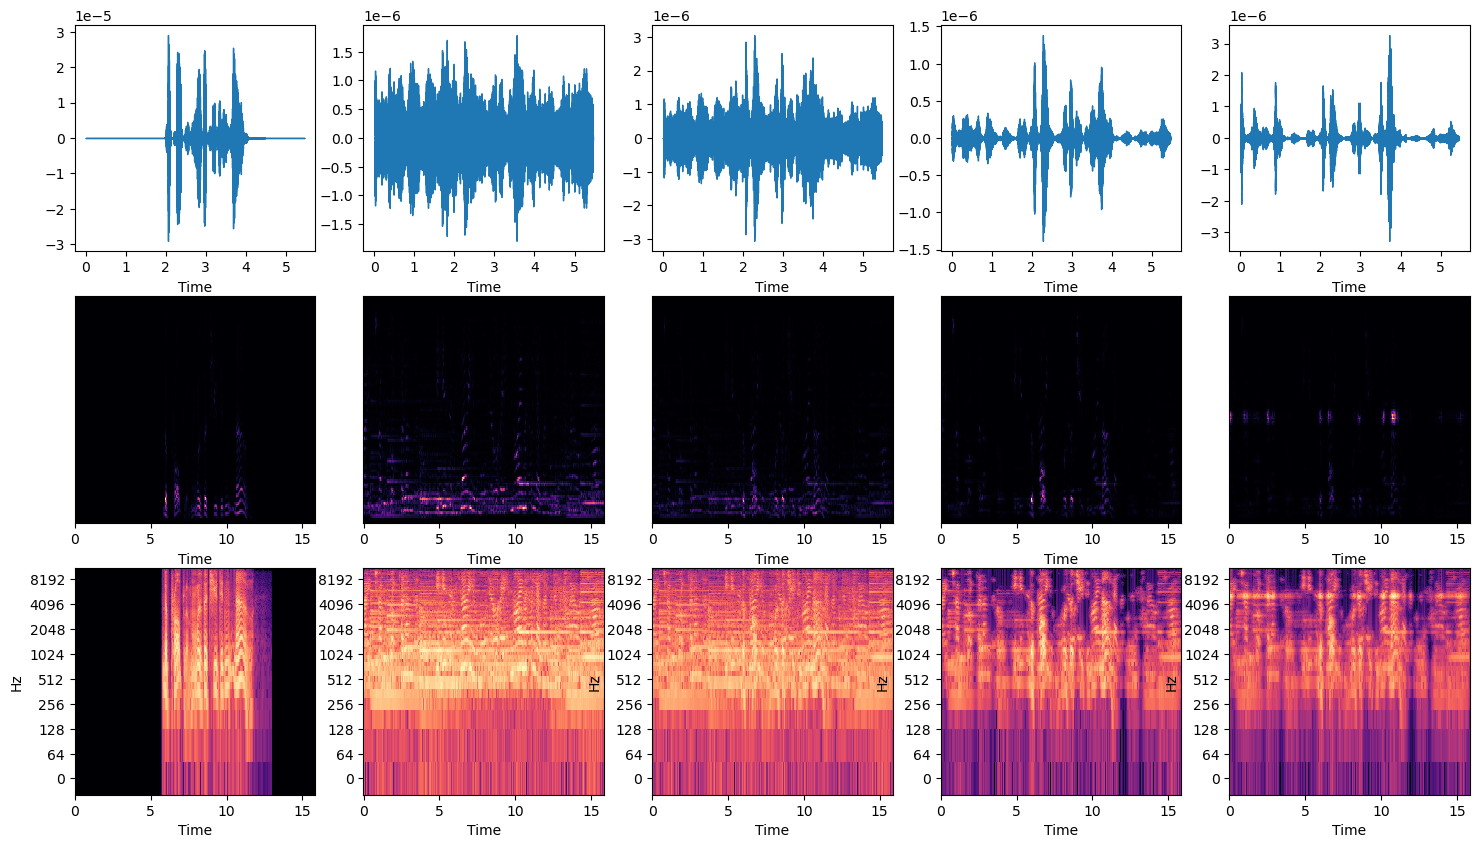

In [347]:
plot_wavespecmel(audio_files, specs, mels, figsize=(18,10))

In [191]:
ipd.Audio(data=clean, rate=sr)

In [192]:
ipd.Audio(data=noise, rate=sr)

In [193]:
ipd.Audio(data=mix, rate=sr)

In [205]:
ipd.Audio(data=reduced_mix, rate=sr)

In [304]:
ipd.Audio(data=aud, rate=sr)